### Car Price Prediction
Dataset: [Car Price Dataset](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)

Dataset Description:
This dataset contains information about various cars, including features that can affect the selling price of a car which can bulid regression models based on technical specifications and other features.

|     Feature     |     Data Type     |    Description     |
|-----------------|-------------------|--------------------|  
|        ID       |       Int         | Unique value from Car|
|      Price      |       Int         | The selling price of the car|
|      Levy       |      String       | Tax or Additional fee associated with the car|
|  Manufacturer   |      String       | The Car's Manufacturer or brand | \n|      Model      |      String       | The specific model of the car |
|     Prod.year   |        Int        | The production year of the car |
|     Category    |      String       | The type or category of the car |
|Leather Interior |      String       | indicates whether the car has a leather  interior ("Yes" Or "nO") |
|    Fuel Type    |      String       | The type of fuel used by the car  |
|  Engine Volume  |      String       | The Engine capacity (in liters), sometimes including "turbo" |
|     Mileage     |      String       | The total distance driven by the car (in kilometers) | 
|     Cylinders   |      Float        | The number of engine cylinders, more cylinders usually mean more power |
| Gear box type   |      String       | The Transmission type |
| Drive Wheels    |      String       | The drive type |
|      Doors      |      String       | The number of doors |
|     Wheel       |      String       | The steering wheel position |
|     Color       |      String       | The exterior color of the car |
|    Airbags      |       Int         | the total number of airbags in the car|
 
Purpose: Performing EDA (Exploratory Data Analysis) , data processing include cleaning data, transforming data and predicting car price base on car specifications using regression

# Preparation

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)



## Import Dataset

In [ ]:
Car_df=pd.read_csv('./Dataset/car_price_prediction.csv')
Car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# EDA (Exploratory Data Analysis)

## Data Understanding

In [3]:
Car_df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [4]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
Car_df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
sum_duplicate=Car_df.duplicated().sum()
print("Sum of Duplicate:", sum_duplicate)

Sum of Duplicate: 313


In [7]:
row, column=Car_df.shape
print("Number of rows in dataframe:",row)
print("Number of columns in dataframe:", column)

Number of rows in dataframe: 19237
Number of columns in dataframe: 18


## Visualization

### Visualization of Car Manufacturer

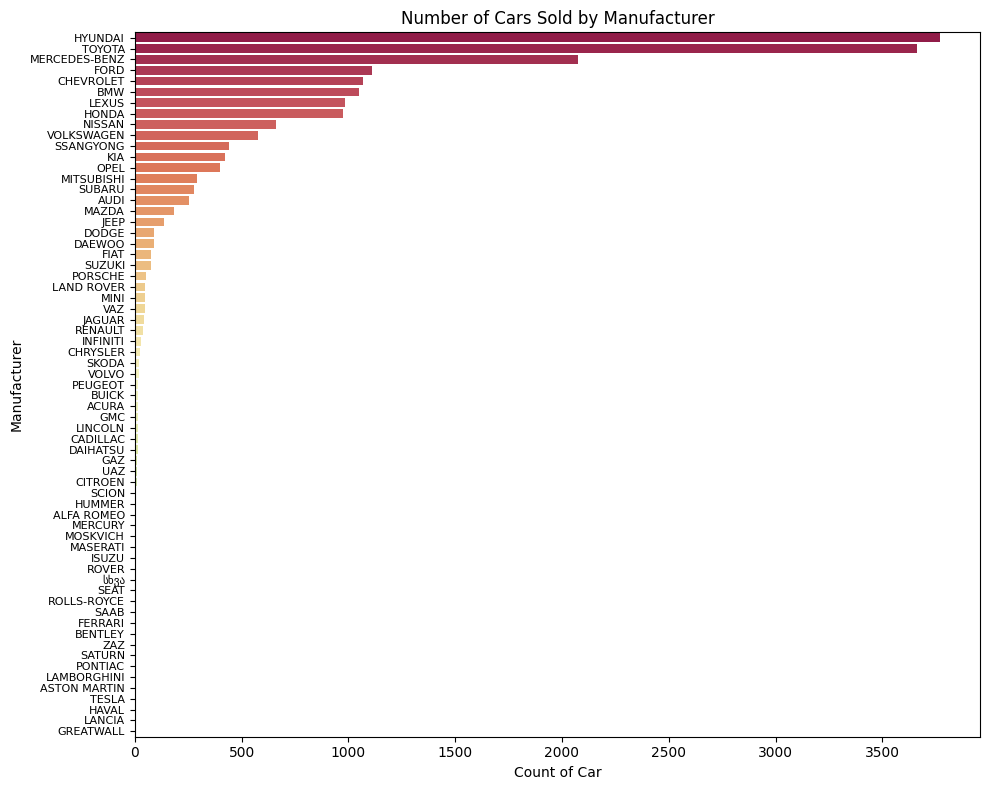

In [8]:
manufacturer_car=Car_df['Manufacturer'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(y=manufacturer_car.index, x=manufacturer_car.values, palette='Spectral')
plt.xlabel('Count of Car')
plt.ylabel('Manufacturer')
plt.title('Number of Cars Sold by Manufacturer')
plt.yticks(fontsize=8, ha='right')
plt.tight_layout()
plt.show()

### Visualization of The 20 Types of Cars Sold

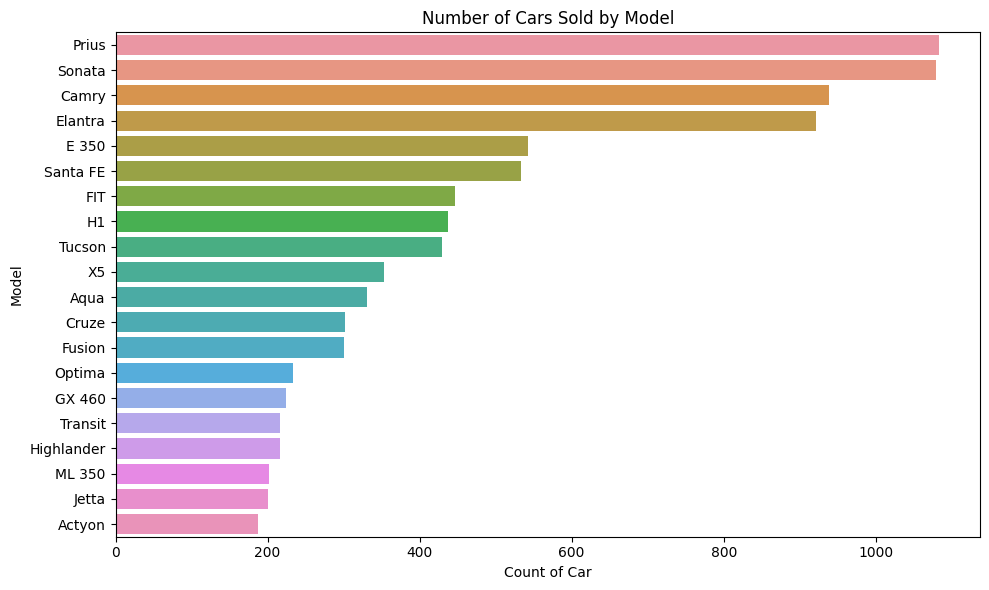

In [9]:
top_model=Car_df['Model'].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(y=top_model.index,x=top_model.values)
plt.xlabel('Count of Car')
plt.ylabel('Model')
plt.title('Number of Cars Sold by Model')
plt.tight_layout()
plt.show()

### Visualization of Car Production Years

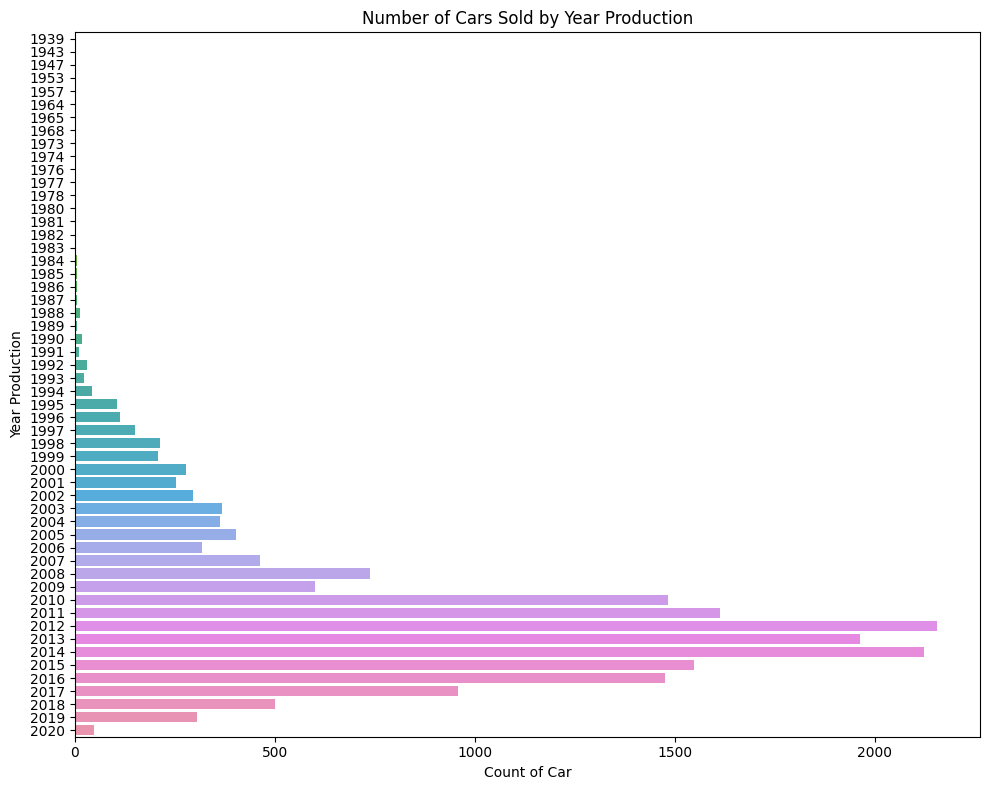

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=Car_df, y='Prod. year')
plt.xlabel('Count of Car')
plt.ylabel('Year Production')
plt.title('Number of Cars Sold by Year Production')
plt.tight_layout()
plt.show()

### Visualization of Car Category

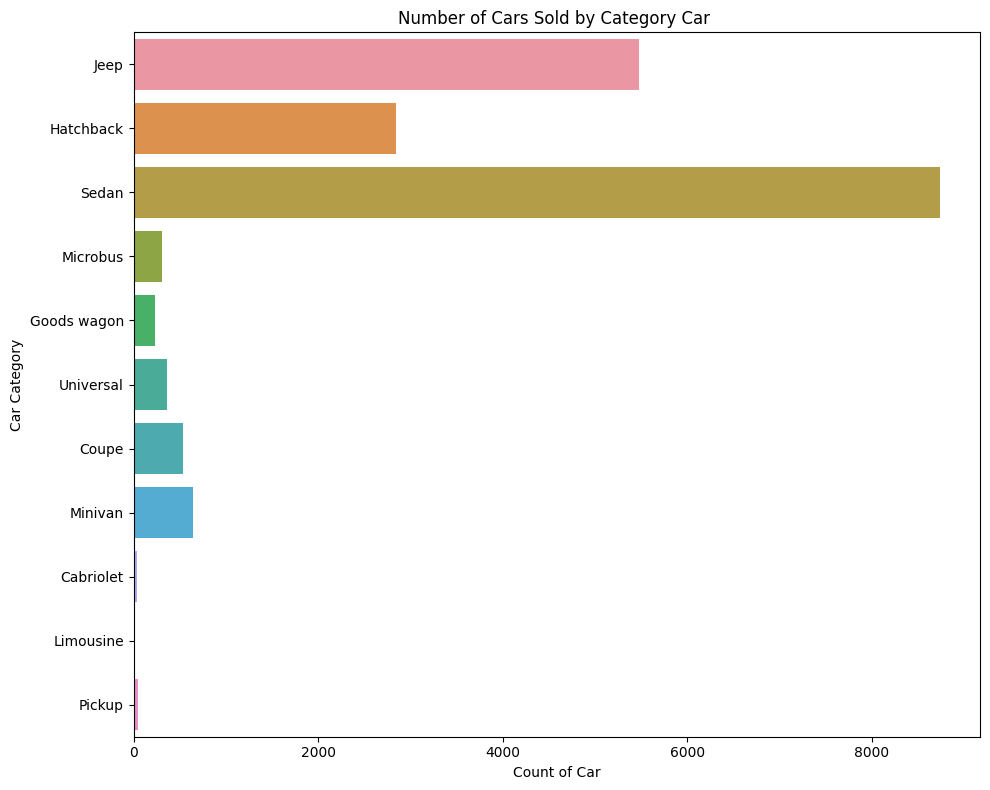

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data=Car_df, y='Category')
plt.xlabel('Count of Car')
plt.ylabel('Car Category')
plt.title('Number of Cars Sold by Category Car ')
plt.tight_layout()
plt.show()

### Visualization of Car Leather Interior or Not

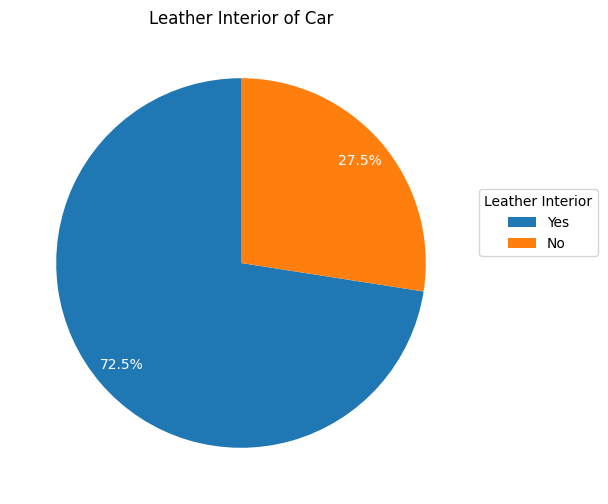

In [12]:
count_leather=Car_df['Leather interior'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_leather.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'color':'white'}
)
plt.title('Leather Interior of Car')
plt.legend(wedges, count_leather.index, title='Leather Interior', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Car Fuel Type

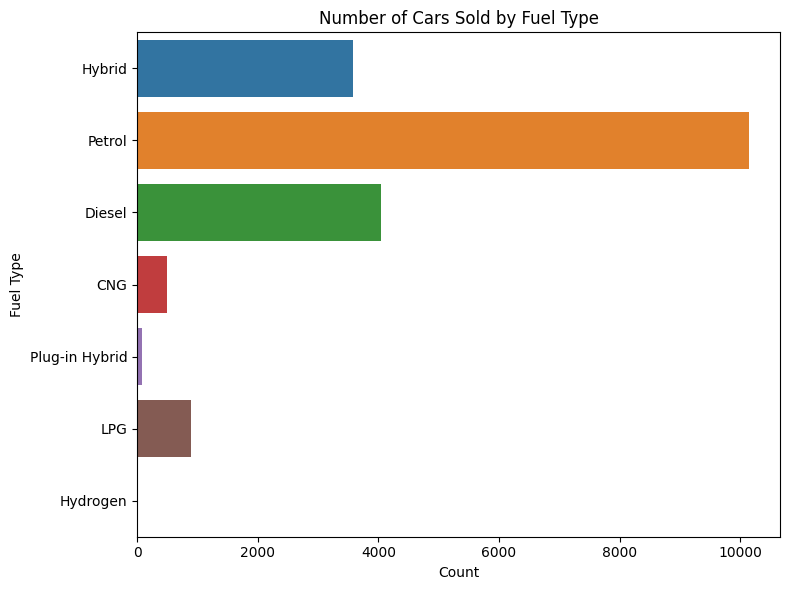

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=Car_df, y='Fuel type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.title('Number of Cars Sold by Fuel Type')
plt.tight_layout()
plt.show()

### Visualization of Car Cylinders Type

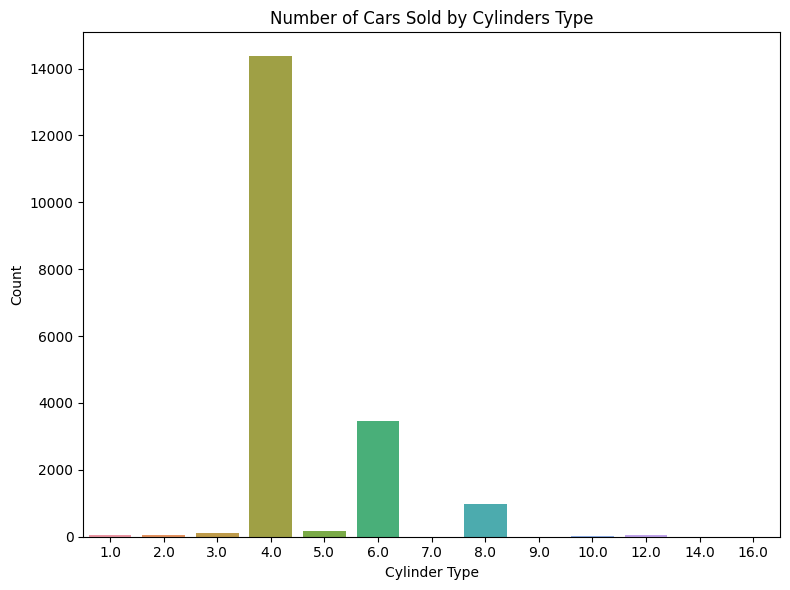

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=Car_df, x='Cylinders')
plt.xlabel('Cylinder Type')
plt.ylabel('Count')
plt.title('Number of Cars Sold by Cylinders Type')
plt.tight_layout()
plt.show()

### Visualization of Car Gearbox Type

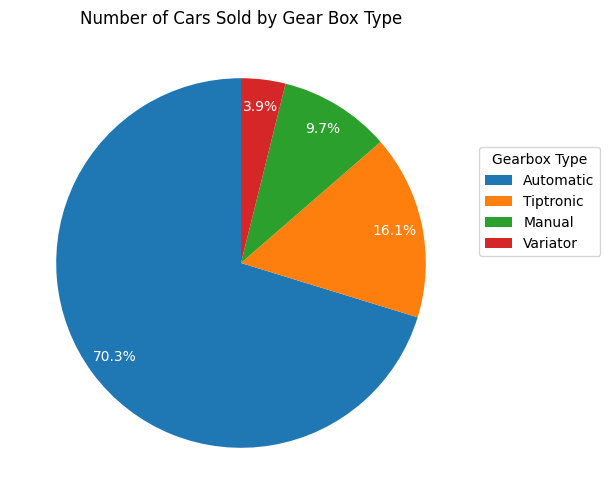

In [15]:
count_gearbox_type=Car_df['Gear box type'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_gearbox_type.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'color':'white'}
)
plt.title('Number of Cars Sold by Gear Box Type')
plt.legend(wedges, count_gearbox_type.index, title='Gearbox Type', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Car Wheels Type

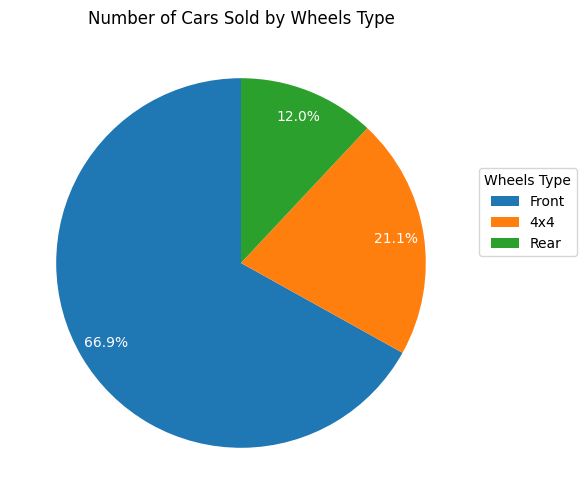

In [16]:
count_door=Car_df['Drive wheels'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_door.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'color':'white'}
)
plt.title('Number of Cars Sold by Wheels Type')
plt.legend(wedges, count_door.index, title='Wheels Type', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Car Doors Type

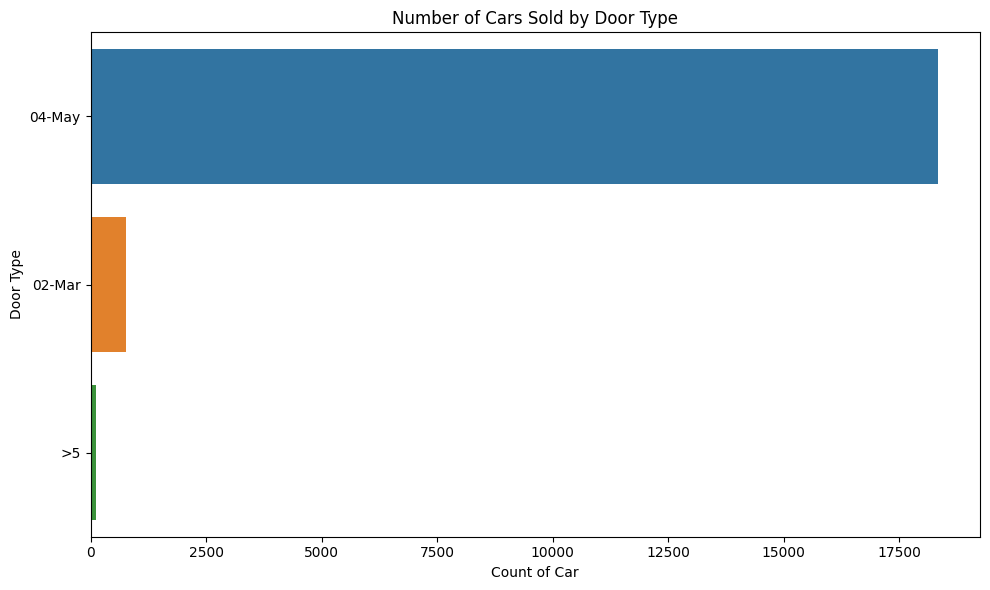

In [17]:
Door_type=Car_df['Doors'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(y=Door_type.index,x=Door_type.values)
plt.xlabel('Count of Car')
plt.ylabel('Door Type')
plt.title('Number of Cars Sold by Door Type')
plt.tight_layout()
plt.show()

### Visualization of Car Colour 

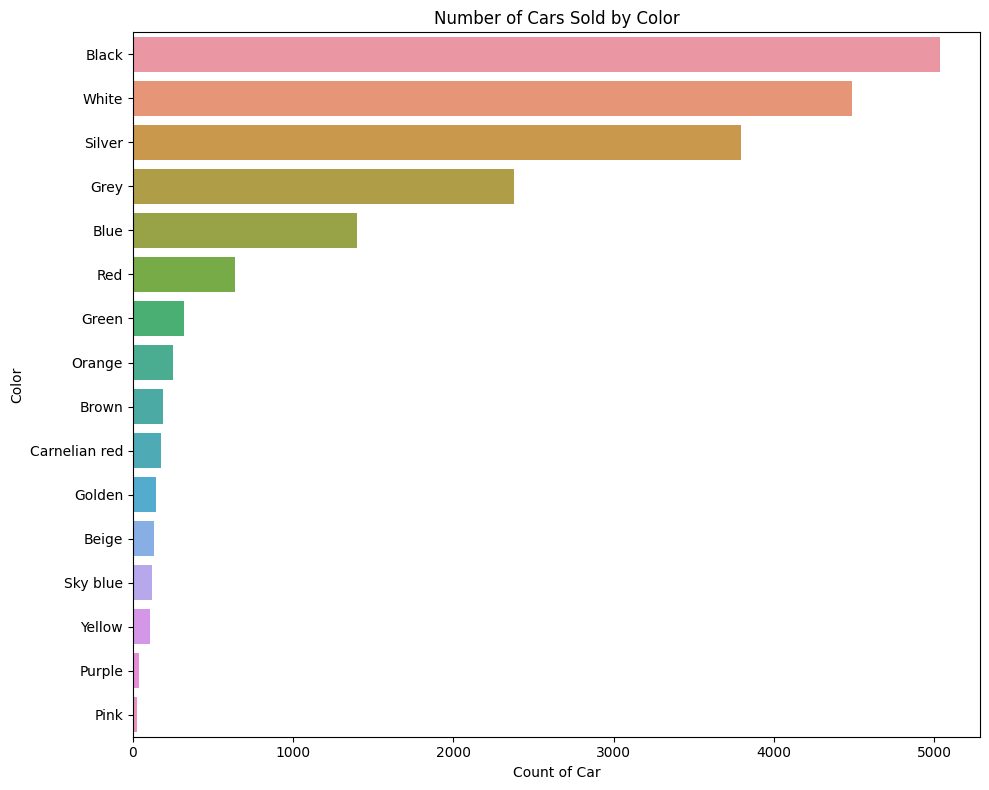

In [18]:
color=Car_df['Color'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(y=color.index, x=color.values)
plt.xlabel('Count of Car')
plt.ylabel('Color')
plt.title('Number of Cars Sold by Color')
plt.tight_layout()
plt.show()

### Boxplot of Numerical Feature

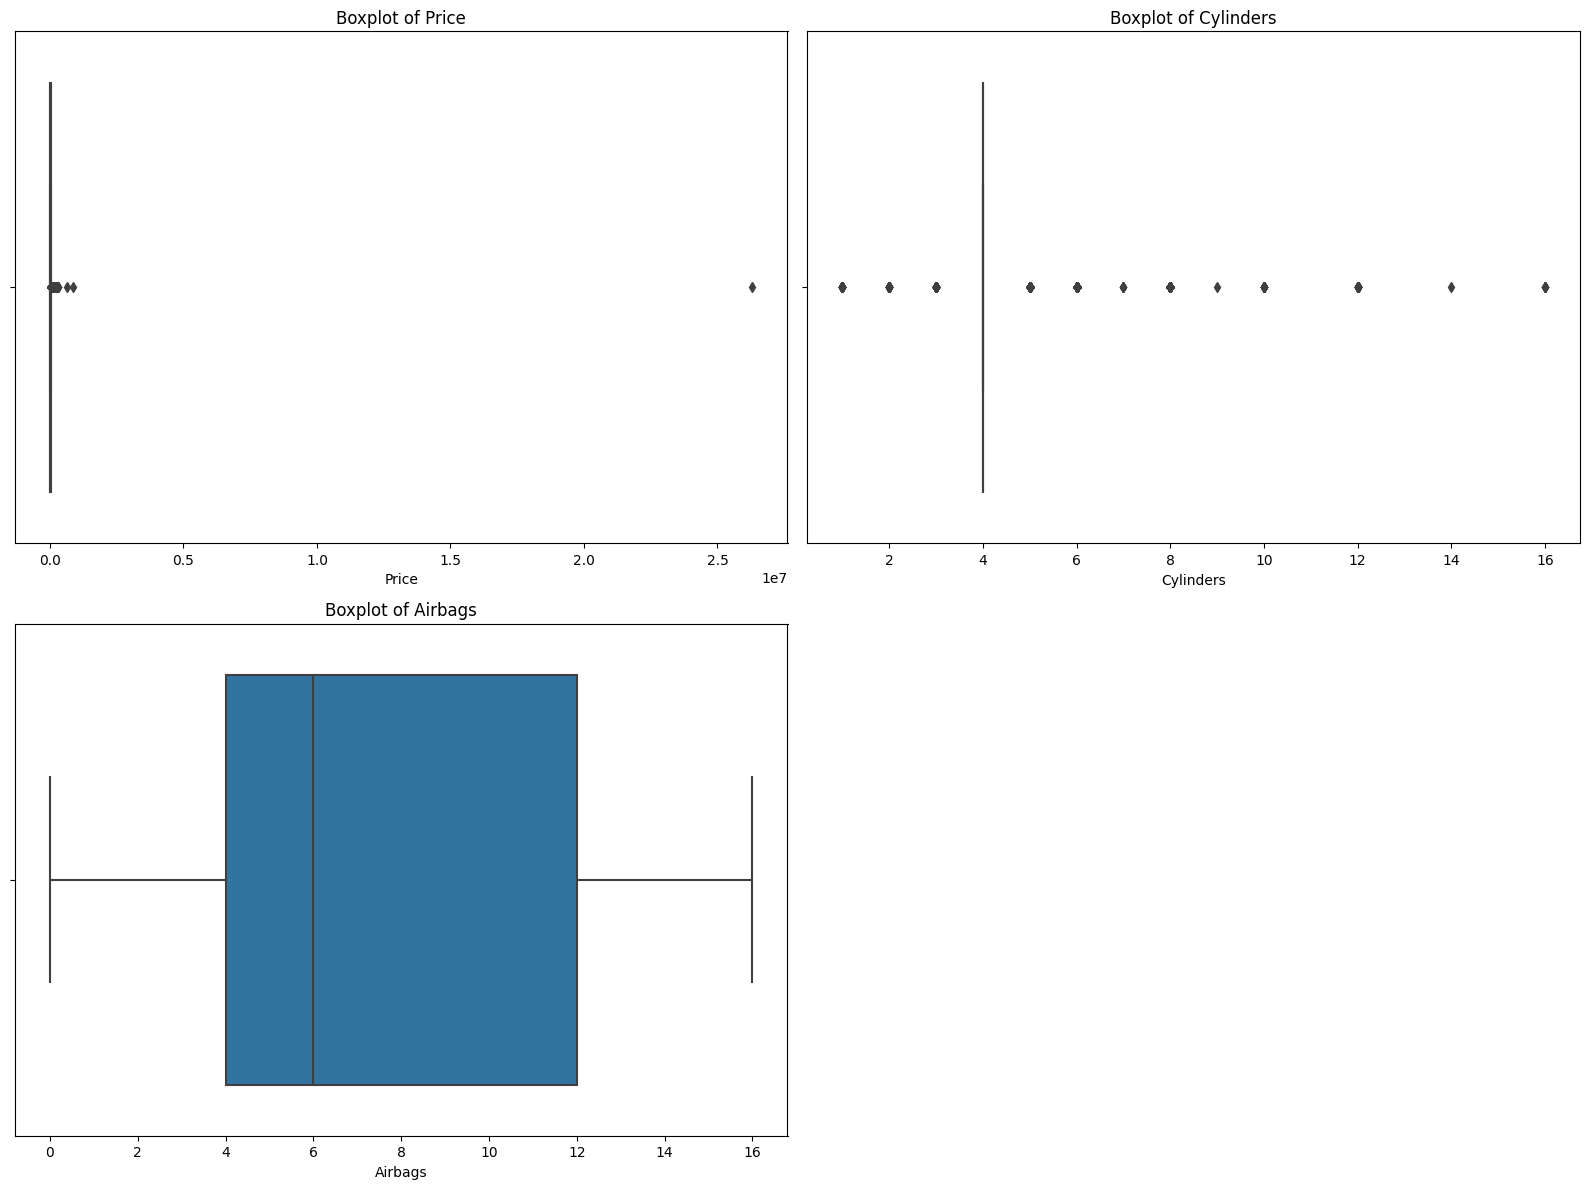

In [19]:
numerical_columns=['Price','Cylinders','Airbags']
fig, axs=plt.subplots(2,2 , figsize=(16,12))
axs=axs.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=Car_df, x=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_xlabel(col)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

### Visualization of Top Car Average Price by Manufacturer

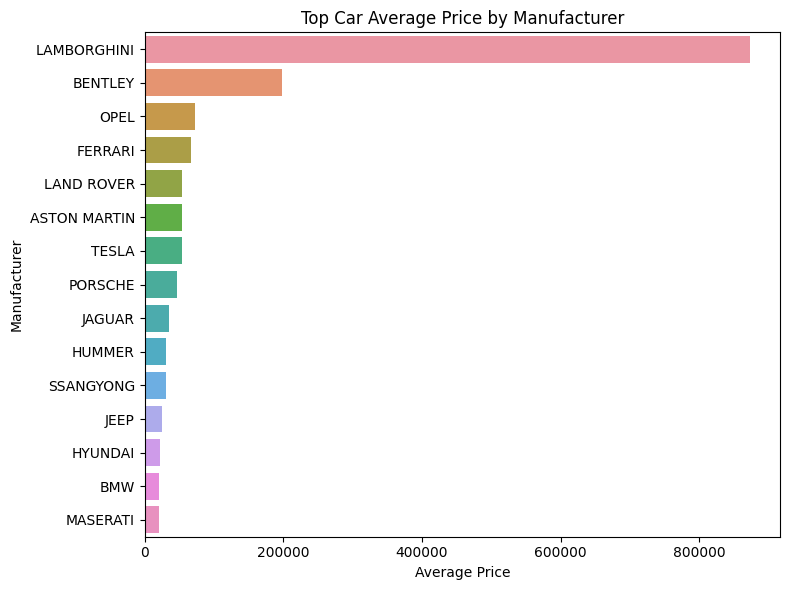

In [20]:
avg_car_price=Car_df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
top_manufacturer=avg_car_price.head(15).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=top_manufacturer, x='Price', y='Manufacturer')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.title('Top Car Average Price by Manufacturer')
plt.tight_layout()
plt.show()

### Visualization of Top 15 Average Car Price by Model

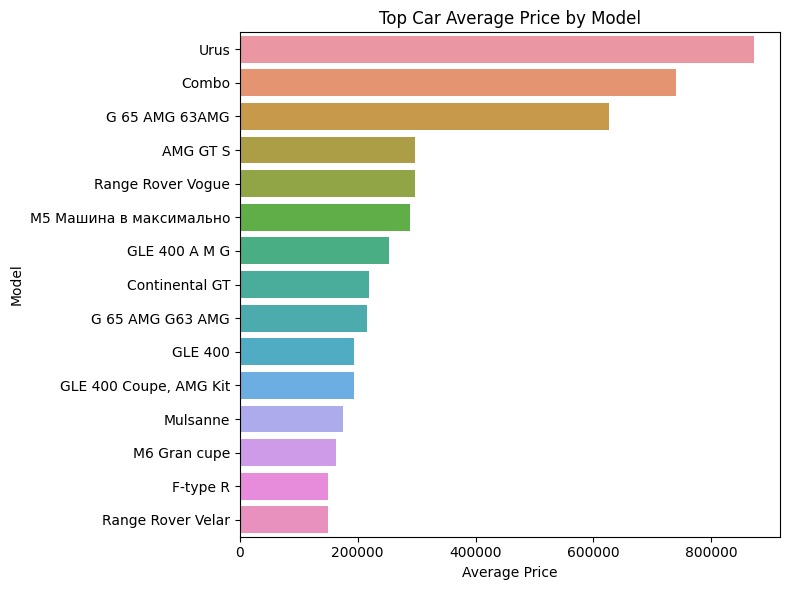

In [21]:
avg_price_model=Car_df.groupby('Model')['Price'].mean().sort_values(ascending=False)
top_model=avg_price_model.head(15).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=top_model, x='Price',y='Model')
plt.xlabel('Average Price')
plt.ylabel('Model')
plt.title('Top Car Average Price by Model')
plt.tight_layout()
plt.show()

# Preprocessing

## Drop Irrelevant Column

In [22]:
Car_df=Car_df.drop(columns=['ID'], axis=1)

## Fix Column Value

In [24]:
Car_df['Levy']=Car_df['Levy'].replace('-', np.nan)
Car_df['Mileage']=Car_df['Mileage'].str.replace('km','', regex=False)

## Drop Missing Data

In [25]:
Car_df=Car_df.dropna()

Drop Duplicate Data

In [28]:
Car_df=Car_df.drop_duplicates()

## Fix Column Type

In [29]:
Car_df['Levy']=Car_df['Levy'].astype(int)
Car_df['Mileage']=Car_df['Mileage'].astype(int)

## Drop Irrelevant Value in Column

In [30]:
Car_df=Car_df.drop(Car_df[Car_df['Cylinders'].isin([1,2,9,14])].index)

In [31]:
Car_df=Car_df[Car_df['Price']>500]

## Encoding

In [32]:
Car_df=pd.get_dummies(Car_df, drop_first=True, dtype=int)

## Split Data Train and Data Testing

In [33]:
X=Car_df.drop(columns='Price', axis=1)
y=Car_df['Price']

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(f'Training Data Shape X_Train {X_train.shape}, y_train {y_train.shape}')
print(f'Test Data Shape X_test {X_test.shape}, y_test {y_test.shape}')

Training Data Shape X_Train (7558, 951), y_train (7558,)
Test Data Shape X_test (1890, 951), y_test (1890,)


# Modeling

## Linear Regression

In [35]:
LR=LinearRegression().fit(X_train, y_train)
eval_LR=LR.predict(X_test)

mae_lr=mean_absolute_error(y_test, eval_LR)
mse_lr=mean_squared_error(y_test, eval_LR)
r2_lr=r2_score(y_test, eval_LR)


In [36]:
Metrics_df=({
    'MAE':[mae_lr],
    'MSE':[mse_lr],
    'R2 Score':[r2_lr]
})
Metrics_df=pd.DataFrame(Metrics_df, index=['Linear Regression'])
Metrics_df.head()

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804


## Random Forest 

In [37]:
RF=RandomForestRegressor().fit(X_train, y_train)
eval_rf=RF.predict(X_test)

mae_rf=mean_absolute_error(y_test, eval_rf)
mse_rf=mean_squared_error(y_test, eval_rf)
r2_rf=r2_score(y_test, eval_rf)

In [38]:
Metrics_df.loc['Random Forest']=[mae_rf, mse_rf, r2_rf]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804
Random Forest,4760.929502,6.926951e+07,0.759145


## Decision Tree

In [39]:
Dt=DecisionTreeRegressor().fit(X_train, y_train )
eval_dt=Dt.predict(X_test)

mae_dt=mean_absolute_error(y_test, eval_dt)
mse_dt=mean_squared_error(y_test, eval_dt)
r2_dt=r2_score(y_test, eval_dt)

In [40]:
Metrics_df.loc['Decision Tree']=[mae_dt, mse_dt, r2_dt]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804
Random Forest,4760.929502,6.926951e+07,0.759145
Decision Tree,6314.892416,1.325550e+08,0.539096


## SVM

In [41]:
SVM=SVR().fit(X_train, y_train)
eval_svm=SVM.predict(X_test)

mae_svm=mean_absolute_error(y_test, eval_svm)
mse_svm=mean_squared_error(y_test, eval_svm)
r2_svm=r2_score(y_test, eval_svm)

In [42]:
Metrics_df.loc['SVM']=[mae_svm, mse_svm, r2_svm]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804
Random Forest,4760.929502,6.926951e+07,0.759145
Decision Tree,6314.892416,1.325550e+08,0.539096
SVM,11903.053403,3.037194e+08,-0.056055


## XGB Regressor

In [43]:
XGB=xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
).fit(X_train, y_train)

eval_xgb=XGB.predict(X_test)

mae_xgb=mean_absolute_error(y_test, eval_xgb)
mse_xgb=mean_squared_error(y_test, eval_xgb)
r2_xgb=r2_score(y_test, eval_xgb)

In [44]:
Metrics_df.loc['XGBosst Regressor']=[mae_xgb, mse_xgb, r2_xgb]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804
Random Forest,4760.929502,6.926951e+07,0.759145
Decision Tree,6314.892416,1.325550e+08,0.539096
SVM,11903.053403,3.037194e+08,-0.056055
XGBosst Regressor,6212.037159,9.607163e+07,0.665952


# Hypertune Parameter

## Random Forest Hypertune Parameter

In [45]:
rf_parameter={
    'n_estimators':[100,150,200],
    'max_depth':[None, 3,5,7],
    'min_samples_leaf':[3,5,7],
    'min_samples_split':[3,5,7] 
}
rf_grid=GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_parameter,
    n_jobs=-1,
    cv=3,
    scoring='r2',
    verbose=0
)
rf_grid.fit(X_train, y_train)
print("Best Parameters:",rf_grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


## Decision Tree Hypertune Parameter

In [48]:
Dt_params={
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,10],
    'max_features':[None,'sqrt','log2']
}
dt_grid=GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=Dt_params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)
dt_grid.fit(X_train, y_train)
print("Best parameters:",dt_grid.best_params_)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


### XGBoost Regressor Hypertune Parameter

In [52]:
xgb_params={
    'n_estimators':[100,200,500],
    'max_depth':[3,5,7],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.7, 0.8, 1],
    'colsample_bytree':[0.7,0.8,1]
}
xgb_grid=GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=xgb_params,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=3,
    verbose=0
)
xgb_grid.fit(X_train, y_train)
print("Best Params:",xgb_grid.best_params_)

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}


## Random Forest (After Hypertune Parameter)

In [46]:
RF1=RandomForestRegressor(
    max_depth= None, min_samples_leaf= 3, min_samples_split= 3, n_estimators=100
).fit(X_train, y_train)
eval_rf1=RF1.predict(X_test)

mae_rf1=mean_absolute_error(y_test, eval_rf1)
mse_rf1=mean_squared_error(y_test, eval_rf1)
r2_rf1=r2_score(y_test, eval_rf1)


In [47]:
Metrics_df.loc['Random Forest (After Hypertune)']=[mae_rf1, mse_rf1, r2_rf1]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804
Random Forest,4760.929502,6.926951e+07,0.759145
Decision Tree,6314.892416,1.325550e+08,0.539096
SVM,11903.053403,3.037194e+08,-0.056055
XGBosst Regressor,6212.037159,9.607163e+07,0.665952
Random Forest (After Hypertune),5146.009025,9.600355e+07,0.666188


## Decision Tree (After Hypertune Parameter)

In [53]:
DT1=DecisionTreeRegressor(
    max_depth=None,
    max_features=None,
    min_samples_leaf=10,
    min_samples_split=2
).fit(X_train, y_train)
eval_dt1=DT1.predict(X_test)
mae_dt1=mean_absolute_error(y_test, eval_dt1)
mse_dt1=mean_squared_error(y_test, eval_dt1)
r2_dt1=r2_score(y_test, eval_dt1)

In [54]:
Metrics_df.loc['Decision Tree (After Hypertune)']=[mae_dt1, mse_dt1, r2_dt1]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804
Random Forest,4760.929502,6.926951e+07,0.759145
Decision Tree,6314.892416,1.325550e+08,0.539096
SVM,11903.053403,3.037194e+08,-0.056055
XGBosst Regressor,6212.037159,9.607163e+07,0.665952
Random Forest (After Hypertune),5146.009025,9.600355e+07,0.666188
Decision Tree (After Hypertune),6397.834550,1.266703e+08,0.559558


## XGBoost (After Hypertune Parameter)

In [55]:
XGB=xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.2,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
).fit(X_train, y_train)

eval_xgb=XGB.predict(X_test)

mae_xgb=mean_absolute_error(y_test, eval_xgb)
mse_xgb=mean_squared_error(y_test, eval_xgb)
r2_xgb=r2_score(y_test, eval_xgb)


In [56]:
Metrics_df.loc['XGBoost Regressor']=[mae_xgb, mse_xgb, r2_xgb]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,8146.448512,1.642749e+08,0.428804
Random Forest,4760.929502,6.926951e+07,0.759145
Decision Tree,6314.892416,1.325550e+08,0.539096
SVM,11903.053403,3.037194e+08,-0.056055
XGBosst Regressor,6212.037159,9.607163e+07,0.665952
Random Forest (After Hypertune),5146.009025,9.600355e+07,0.666188
Decision Tree (After Hypertune),6397.834550,1.266703e+08,0.559558
XGBoost Regressor,5305.421718,8.790590e+07,0.694345


### Conculusion
- After the training process, it was observed that random forest had better metrics than other machine learning models. However, after hyperparameter tuning on random forest, decision tree, and XGB regressor, random forest experienced a decrease in metrics, suggesting overfitting, while decision tree and XGB regressor showed an increase in metrics.